In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path("./")))

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np
from utils import loaders,model_body_1gpu


NUM_GPU=1
EPOCHS=500
NITER=20
#-------------------------------------Loader Building---------------------------------
train_set=loaders.CostumImFolder(["./data/anime/train_img/"],
                                 ["./data/anime/train_label/"],ifbody=True,ifhead=False)

train_loader=DataLoader(train_set, batch_size=6, shuffle=True,num_workers = 4*NUM_GPU,pin_memory=True)

print(train_set.transform)
GAN_DIM=24+5+5+1
HEAD_GAN_DIM=14+1
mydevice=torch.device("cuda:3")
#-------------------------------------Model Building---------------------------------
big_model=model_body_1gpu.Pix2PixHDModel(GAN_DIM,3).to(mydevice)
#-------------------------------------Model Training---------------------------------
big_model.load_state_dict(torch.load("./model_body_1GPU/GAN_run10.pt"))
for in_img,lbl_sample,_,_,_ in train_loader:
    with torch.no_grad():
        ############### Forward ####################
        losses, out_img = big_model(torch.tensor(lbl_sample,dtype=torch.float32, device=mydevice)
                                  ,torch.tensor(in_img,dtype=torch.float32, device=mydevice)
                                  , torch.tensor(0,dtype=torch.float32, device=mydevice), infer=True)
    break

img_1_1_keypoints-checkpoint.json not imported
Compose(
    Resize(size=(512, 512), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Lambda()
)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

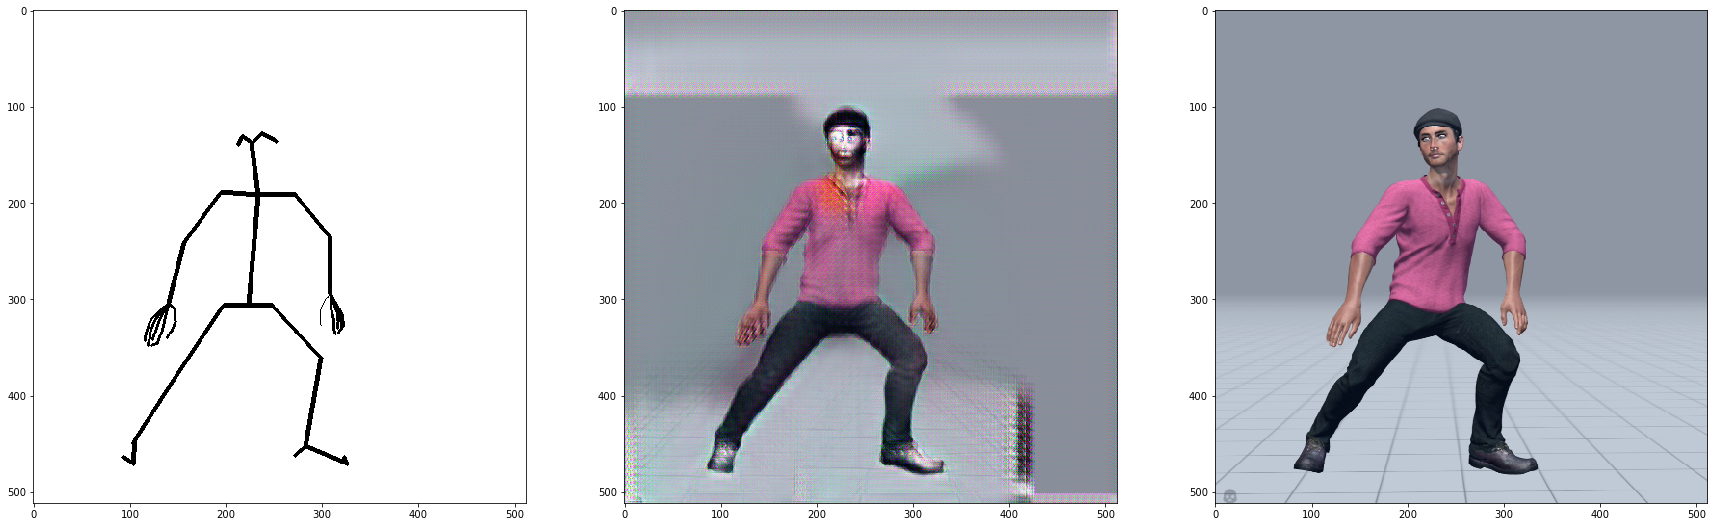

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,60))


plt.subplot(1,3,1)
plt.imshow(lbl_sample[0,34,...].detach().cpu().numpy(),"gray")
plt.subplot(1,3,2)
plt.imshow(out_img[0,...].detach().cpu().numpy().transpose(1,2,0))
plt.subplot(1,3,3)
plt.imshow(in_img[0,...].detach().cpu().numpy().transpose(1,2,0))
plt.show()

In [7]:
list(big_model.netG.parameters()).__len__()
#(list(big_model.netG.parameters())+list(big_model.facenetG.parameters())).__len__()

36

In [62]:
import torch.nn as nn
LABEL_NC=0
DATA_TYPE=32
NO_INSTANCE=True
USE_FEATURES=True
LOAD_FEATURES=False
LABEL_FEAT=False
def get_edges(t):
        edge = torch.cuda.ByteTensor(t.size()).zero_()
        edge[:,:,:,1:] = edge[:,:,:,1:] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,:,:-1] = edge[:,:,:,:-1] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,1:,:] = edge[:,:,1:,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        edge[:,:,:-1,:] = edge[:,:,:-1,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        if DATA_TYPE==16:
            return edge.half()
        else:
            return edge.float()
        
def encode_input(label_map, inst_map=None, real_image=None, feat_map=None, infer=False):             
    if LABEL_NC == 0:
        input_label = label_map.data.cuda()
    else:
        # create one-hot vector for label map 
        size = label_map.size()
        oneHot_size = (size[0], LABEL_NC, size[2], size[3])
        input_label = torch.cuda.FloatTensor(torch.Size(oneHot_size)).zero_()
        input_label = input_label.scatter_(1, label_map.data.long().cuda(), 1.0)
        if DATA_TYPE == 16:
            input_label = input_label.half()

    # get edges from instance map
    if not NO_INSTANCE:
        inst_map = inst_map.data.cuda()
        edge_map = get_edges(inst_map)
        input_label = torch.cat((input_label, edge_map), dim=1)         
    input_label = Variable(input_label, volatile=infer)

    # real images for training
    if real_image is not None:
        real_image = Variable(real_image.data.cuda())

    # instance map for feature encoding
    if USE_FEATURES:
        # get precomputed feature maps
        if LOAD_FEATURES:
            feat_map = Variable(feat_map.data.cuda())
        if LABEL_FEAT:
            inst_map = label_map.cuda()

    return input_label, inst_map, real_image, feat_map

In [41]:
input_label, inst_map, real_image, feat_map=encode_input(bb.sum(1).unsqueeze(1))

RuntimeError: CUDA error: device-side assert triggered

In [5]:
print(bb.shape)
print(bb.max(),bb.min())

torch.Size([10, 3, 256, 512])
tensor(255.) tensor(0.)


In [19]:
cc=bb.max(1).values.unsqueeze(1)

In [20]:
cc.shape

torch.Size([10, 1, 256, 512])

In [4]:
B=bb.view(10,3,256*512)

In [11]:
B=bb.detach().transpose(1,3).contiguous().view(10*256*512,3).numpy().copy()
print(B.shape)
print(B.max())

(1310720, 3)
255.0


In [12]:
import numpy as np
V=(B!=255).any(1)
M=np.intc(B[V,:])
M.shape

(25023, 3)

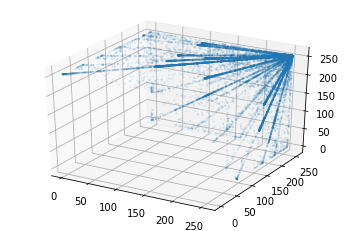

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax,xs=M[:,0],ys= M[:,1], zs=M[:,2],alpha=0.1,s=1)

In [57]:
import numpy as np
M=np.intc(np.sort(M,axis=0))

In [38]:
cc.shape

(256, 512, 3)

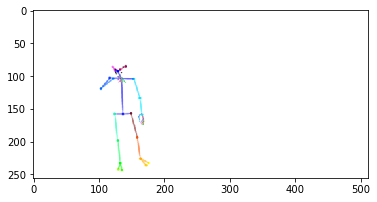

In [3]:
cc=bb[0,...].detach().numpy().copy().transpose(1,2,0)

plt.imshow(np.intc(cc))

In [8]:
bb.max(1).values.shape

torch.Size([10, 256, 512])

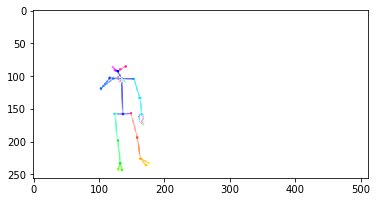

In [10]:
dd=(bb/(bb.max(1).values).unsqueeze(1))[0].detach().numpy().copy().transpose(1,2,0)
plt.imshow(dd)

NameError: name 'input_label' is not defined

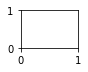

In [32]:
for ii in range(21):
    plt.subplot(5,5,ii+1)
    plt.imshow(input_label[0,ii,...].detach().cpu())